In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [2]:
tf.__version__

'2.1.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

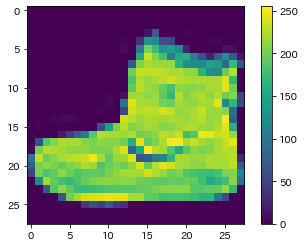

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [14]:
train_images = train_images / 255.
test_images = test_images / 255.

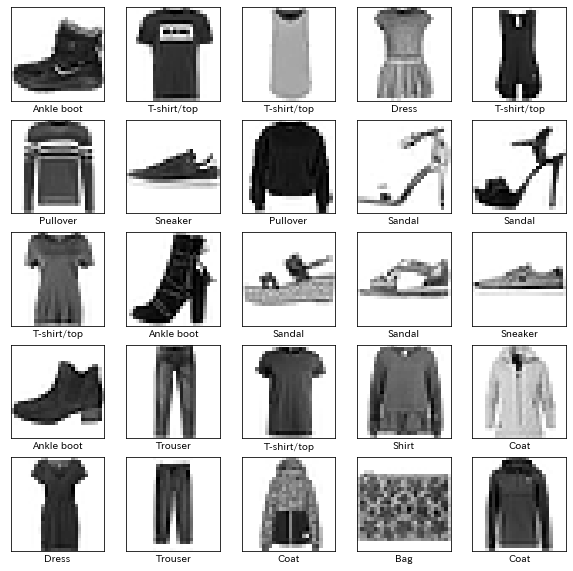

In [15]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4977 - accuracy: 0.8245
Epoch 2/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3750 - accuracy: 0.8634
Epoch 3/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3367 - accuracy: 0.8770
Epoch 4/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3148 - accuracy: 0.8845
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2952 - accuracy: 0.8900s -
Epoch 6/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2815 - accuracy: 0.8956s - loss: 0.2826 - accu
Epoch 7/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2695 - accuracy: 0.8990
Epoch 8/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2577 - accuracy: 0.9053
Epoch 9/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2460 - accur

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/10000 - 1s - loss: 0.3804 - accuracy: 0.8691


In [20]:
predictions = model.predict(test_images)

In [21]:
predictions[0]

array([3.51769518e-06, 1.66703167e-08, 1.02049924e-07, 1.34832865e-11,
       7.46063300e-09, 9.24874190e-03, 4.29860961e-07, 3.29945683e-02,
       1.57303570e-09, 9.57752585e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(
        f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% ({class_names[true_label]})", 
        color=color
    )

In [29]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

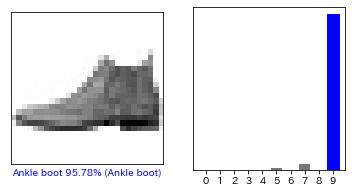

In [30]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

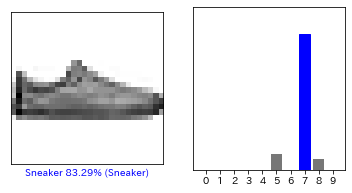

In [31]:
i = 12 
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

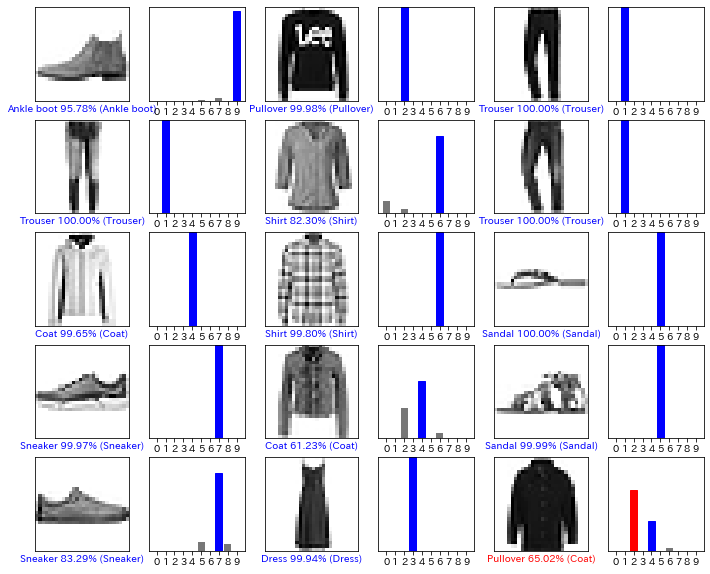

In [32]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

In [33]:
img = test_images[1]

In [35]:
img.shape

(28, 28)

In [36]:
img = (np.expand_dims(img, 0))

In [37]:
print(img.shape)

(1, 28, 28)


In [38]:
predictions_single = model.predict(img)

In [39]:
predictions_single

array([[1.7607199e-05, 4.4676372e-15, 9.9977022e-01, 2.5461186e-10,
        4.7483889e-05, 5.6008809e-12, 1.6472091e-04, 7.9650311e-15,
        5.3110641e-13, 6.4355323e-15]], dtype=float32)

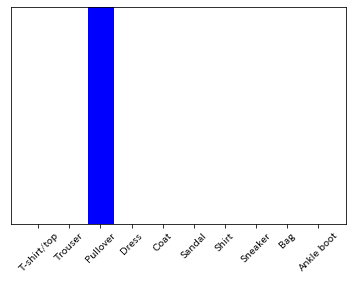

In [42]:
plot_value_array(1, predictions_single[0], test_labels)
plt.xticks(range(10), class_names, rotation=45);

In [43]:
np.argmax(predictions_single[0])

2

In [45]:
import tensorflow_datasets as tfds

In [46]:
train_data, validation_data, test_data = tfds.load(name='imdb_reviews', split=('train[:60%]', 'train[:60%]', 'test'), as_supervised=True)

Shuffling and writing examples to /Users/shouta_shimizu/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZB4MR2/imdb_reviews-train.tfrecord


Shuffling and writing examples to /Users/shouta_shimizu/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZB4MR2/imdb_reviews-test.tfrecord


Shuffling and writing examples to /Users/shouta_shimizu/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZB4MR2/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /Users/shouta_shimizu/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [47]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [48]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"

In [49]:
import tensorflow_hub as hub

In [50]:
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

In [52]:
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [53]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
history = model.fit(train_data.shuffle(10000).batch(512), epochs=20, validation_data=validation_data.batch(512), verbose=1)

Epoch 1/20
30/30 [==============================] - 4s 137ms/step - loss: 2.4074 - accuracy: 0.4768 - val_loss: 1.2501 - val_accuracy: 0.4160
Epoch 2/20
30/30 [==============================] - 3s 107ms/step - loss: 0.9850 - accuracy: 0.4301 - val_loss: 0.8304 - val_accuracy: 0.4587
Epoch 3/20
30/30 [==============================] - 3s 108ms/step - loss: 0.7475 - accuracy: 0.5155 - val_loss: 0.6828 - val_accuracy: 0.5803
Epoch 4/20
30/30 [==============================] - 3s 97ms/step - loss: 0.6576 - accuracy: 0.6091 - val_loss: 0.6344 - val_accuracy: 0.6398
Epoch 5/20
30/30 [==============================] - 3s 96ms/step - loss: 0.6213 - accuracy: 0.6535 - val_loss: 0.6071 - val_accuracy: 0.6681
Epoch 6/20
30/30 [==============================] - 3s 101ms/step - loss: 0.5956 - accuracy: 0.6810 - val_loss: 0.5826 - val_accuracy: 0.6959
Epoch 7/20
30/30 [==============================] - 3s 98ms/step - loss: 0.5735 - accuracy: 0.7066 - val_loss: 0.5597 - val_accuracy: 0.7195
Epoch 8/2

In [56]:
results = model.evaluate(test_data.batch(512), verbose=2)
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.3f}")

loss: 0.349
accuracy: 0.851
